<h1 align ='center'> Analysis of new Farm Laws: Better for whom and why? <h1> 
<h2 align = 'center'> Project report <h2>
<h3 align = 'center'> Group I <h3>
<p align = 'center'> Jeet Rajde (CH17B067) <br \>
Sayan Mitra (EE18B156) <br \>
B Aditi (MM19B022)



# Problem Statement
This project aims to computationally simulate the farmers' market upon the implementation of the Agricultural Bill 2020. In particular, we aim to simulate and predict the trends in the market after it is opened up for corporates, traders and other organisations beyond the state APMC. The expected ideal trend is an equitable distribution of market share among the various stakeholders present in the market. However, speculations of the entire market share being monopolised by dominant corporates are also causing concern. 

In this model, we analyse the parameters that lead to a perfectely competitive and a monopolised market



# Backgound
Owing to the new farm laws, many companies such as relience are expected to compete with mandis in the farmers' market in an attempt to break the monopoly. On further research, we observed that the capitals of these companies were comparable and using this information we deviced a model that may closely represent the market upon the implementation of the law 

# Model and Code
For our model, we will be focusing on the following key agents: <br>
Farmer, corporate, Mandi, Consumer <br>

The key quantities taken into account are the individual capital of the stakeholders, the marketshare of the different corporates and the mandis, the quantity of produce produced, quantity stocked by the middlemen, quantity demanded and sold. 

The simulation consists of 3 main classes: Farmers class, Middle men class and the consumers class. While the farmers and consumers class describe the characteristics of the respective stakeholders, the middlemen class describes the strategies and characteristics of the corporates and mandis. The major distinguishing factor between the coporates and the mandis is the initial market share distribusion. 

Further details regarding the model are mentioned below:


## Importing Function

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import math

## Middle men class


This class aims to set the characteristic parameters of the corporates and the mandis. In this class, the quantity of product required is a piecewise function of fractions of the company's/ mandi's capital and their respective market shares. 

In [ ]:
class Middle_Man:
  def __init__(self,name, ms, cap):
    #Primary
    self.name = name
    self.market_share = ms
    self.capital_old = 0
    self.capital = cap
    self.produce = 0
    #Secondary
    self.produce_req = 0.1*self.capital + 0.6*self.market_share
    self.quantity_req = self.produce_req
    
    self.afford = 0
    if self.market_share < 0.5:
      self.price_afford = 0.001*self.capital + 0.1*self.market_share
    else:
      self.price_afford = 0.001*self.capital - 0.1*self.market_share

    self.price_can_sell = 0
    if self.market_share < 0.5:
      self.price_can_sell = self.price_afford + 0.001*self.capital + 0.01*self.market_share
    else:
      self.price_can_sell = self.price_afford + 0.001*self.capital + self.market_share

In [ ]:
List_MM = []

## Farmers class

This class defines the characteristic features of the farmer. The farmer makes a certain amount of produce and sells to the middleman that offers the maximum price to the given product. 

In [ ]:
class Farmer:
  def __init__(self,name, cap, prod_gen):
    self.name = name
    self.capital = cap
    self.produce_gen = prod_gen

    self.produce = prod_gen
    self.price_sell = self.produce/self.capital #To modify

  def company_determiner(p_afford, quant, p_sell): #To modify
    return quant*(p_afford - p_sell) 

  def who_to_sell_to(self):
    highest = 0
    corp_sell = List_MM[0]
    for i,corps in enumerate(List_MM):
      test = self.company_determiner(corps.price_afford, corps.quantity_req, self.price_sell)
      if i == 0:
        highest = test
        corp_sell = corps
      if highest < test:
        highest = test
        corp_sell = corps
    return corp_sell

  def transaction(self, corp, price):
    
    corp.capital_old = corp.capital

    if self.produce >= corp.produce_req:
      self.produce = self.produce - corp.produce_req
      corp.produce = corp.produce + corp.produce_req
      self.capital = self.capital + price*corp.produce_req
      corp.capital = corp.capital - price*corp.produce_req
      corp.produce_req = 0

    else:
      corp.produce = corp.produce + self.produce
      corp.produce_req = corp.produce_req - self.produce
      self.capital = self.capital + price*self.produce
      corp.capital = corp.produce - price*self.produce
      self.produce = 0
      if corp.produce_req < 0:
        corp.produce_req = 0


## Consumer Class

The consumer class characterizes the consumers in the market. The consumer has a particular demand for the given product. The consumers' strategy is to buy the product from the middleman that offers the lowest price. 

In [ ]:
class Consumer:
  def __init__(self, cap, prod_req):
    self.capital = cap
    self.produce_req = prod_req
    self.produce = 0 

  def company_determiner(p_can_sell,p_buy): 
    return p_can_sell - p_buy

  def who_to_buy_from(self):
    lowest = 0
    comp_buy = List_MM[0]
    for i,corps in enumerate(List_MM):
      test = self.company_determiner(corps.price_can_sell, self.price_buy)
      if i == 0:
        lowest = test
        corp_buy = corps

      if lowest > test:
        lowest = test
        corp_buy = corps
    return corp_sell

  def transaction(self, corp, price):

    corp.capital_old = corp.capital

    if self.produce_req >= corp.produce:
      self.produce = self.produce + corp.produce
      self.produce_req = self.produce_req - corp.produce
      self.capital = self.capital - price*corp.produce
      corp.capital = corp.capital + price*corp.produce
      corp.produce = 0

    else:
      corp.produce = corp.produce - self.produce_req
      self.produce = self.produce + self.produce_req
      self.capital = self.capital - price*self.produce_req
      corp.capital = corp.produce + price*self.produce_req
      self.produce_req = 0
      #if corp.produce_req < 0:
        #corp.produce_req = 0




## Simulation

In [ ]:
'''
Market share = Old MS + dMs
dMs = (revenue generated)/(total revenue)
'''

def del_market_share():
  for corp in List_MM:
    dMs = 0.001*(corp.capital - corp.capital_old)
    corp.market_share = corp.market_share + dMs
    return 
    

Simulation 1: The companies entering the market have comparitive capitals to that of mandis. The ratio of capitals are as follows - mandi : A : B : C = 1:4:3:2 \\
The market share of mandi is initially assumed to be 1 and that of the corporates are assumed to be 0. 

In [ ]:
#Declaring initial values
ms_mandi = [1]
ms = [[0],[0],[0]]
cap_mandi = 100000
cap = [400000, 300000, 200000]
farm_cap = [100]
farm_prod_gen = 1000

#declaring class
Mandi = Middle_Man('mandi', ms_mandi[0], cap_mandi)
comp = []
comp.append(Middle_Man('A', ms[0][0], cap[0]))
comp.append(Middle_Man('B', ms[1][0], cap[1]))
comp.append(Middle_Man('C', ms[2][0], cap[2]))
farm = Farmer('farm', farm_cap[0], farm_prod_gen)

#Declaring hyperparameters for expected market shares
k_mandi = 0.1
k = [0.1,0.1,0.1]
sat = [0.26, 0.23, 1-(0.3+0.26+0.23)]

iterations = list(range(200))
for i in iterations:
  for j in range(3):
    trans = farm.transaction
    farm_cap.append(farm.capital)
    ms[j].append(sat[j]*(1-np.exp(-k[j]*i)) + np.random.rand()*0.5*(sat[j]**2))

  ms_mandi.append(1-ms[0][i] - ms[1][i] - ms[2][i])

In [ ]:
#expected change in farmer capital 
farm_capital = []
k_farm = 0.3
k_scale = 5

for i in iterations:
  farm_capital.append(k_scale*np.log(k_farm*i + 20) + np.random.rand()*0.4*np.abs(k_scale)*0.7 + 84 )

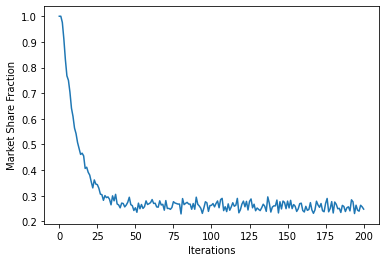

In [ ]:
plt.plot(ms_mandi)
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

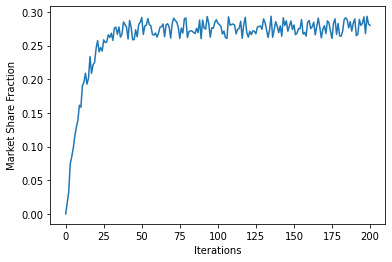

In [ ]:
plt.plot(ms[0])
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

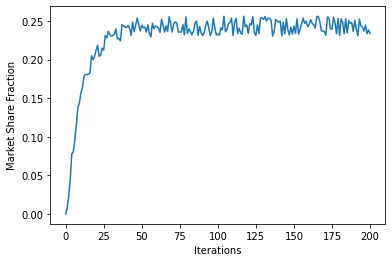

In [ ]:
plt.plot(ms[1])
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

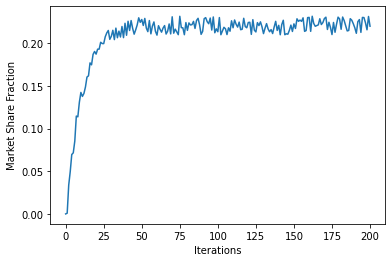

In [ ]:
plt.plot(ms[2])
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

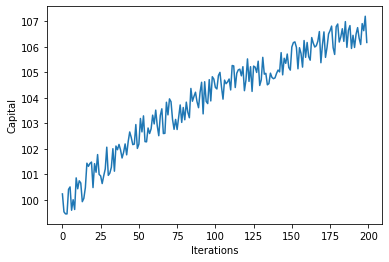

In [ ]:
plt.plot(farm_capital)
plt.ylabel("Capital")
plt.xlabel("Iterations")
plt.show()

From the above graphs we observe that the market share for mandis go down while the market share for the corporate sompanies increase. leding to an equilibrium where all companies have more or less the same market share (or equivalent). Further, we also observe that the farmers' capital increases, thereby making this the ideal market. 

Simulation 2: When one of the companies have considerably higher capital than other corporatea and mandi. In this case, the capitals of the middle men are in the following ratio, mandi : A : B : C = 1:20:3:2

In [ ]:
#declaring parameters
ms_mandi = [1]
ms = [[0],[0],[0]]
k_mandi = 0.05
k = [0.05,0.05,0.05]
sat = [1, 0, 0]
cap_mandi = 100000
cap = [2000000, 300000, 200000]
farm_cap = [100]
farm_prod_gen = 1000

#declaring class
Mandi = Middle_Man('mandi', ms_mandi[0], cap_mandi)
comp = []
comp.append(Middle_Man('A', ms[0][0], cap[0]))
comp.append(Middle_Man('B', ms[1][0], cap[1]))
comp.append(Middle_Man('C', ms[2][0], cap[2]))
farm = Farmer('farm', farm_cap[0], farm_prod_gen)

iterations = list(range(200))
saturated = False
for i in iterations:

  if saturated:
    break

  for j in range(3):
    trans = farm.transaction
    farm_cap.append(farm.capital)
    ms[j].append(sat[j]*(1-np.exp(-k[j]*i)) + np.random.rand()*0.1*(sat[j]))

  if not saturated:
    ms_mandi.append(1-ms[0][i] - ms[1][i] - ms[2][i])
    
  if ms[0][-1] >= 1:
    ms[0][-1] = 1
    saturated = True
    for k in range(200-i):
      ms[0].append(1)
      ms[1].append(0)
      ms[2].append(0)
      ms_mandi.append(0)
   

  if ms[1][-1] >= 1:
    ms[1][-1] = 1
    saturated = True
    for k in range(200-i):
      ms[1].append(1)
      ms[0].append(0)
      ms[2].append(0)
      ms_mandi.append(0)
    

  if ms[2][-1] >= 0.99:
    ms[2][-1] = 1
    saturated = True
    for k in range(200-i):
      ms[2].append(1)
      ms[1].append(0)
      ms[0].append(0)
      ms_mandi.append(0)
    

  

  

In [ ]:
#Expected change in farmers capital
farm_capital = []
k_farm = 0.6
k_scale = -3
for i in iterations:
  farm_capital.append(k_scale*np.log(k_farm*i + 20) + np.random.rand()*0.4*np.abs(k_scale)*0.7 + 84 + 24.5)

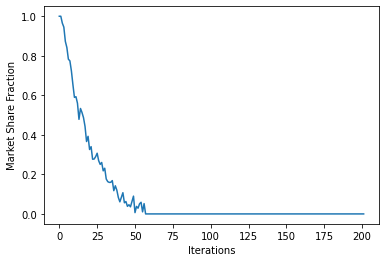

In [ ]:
plt.plot(ms_mandi)
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

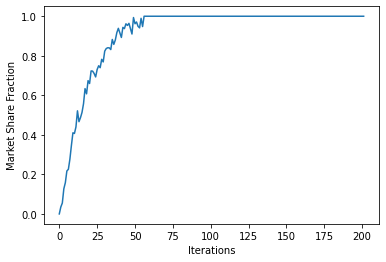

In [ ]:
plt.plot(ms[0])
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

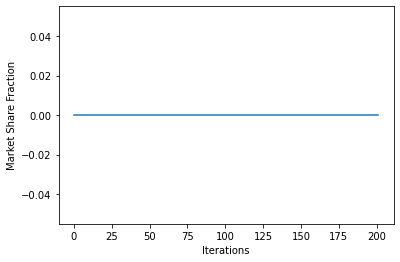

In [ ]:
plt.plot(ms[1])
plt.ylabel("Market Share Fraction")
plt.xlabel("Iterations")
plt.show()

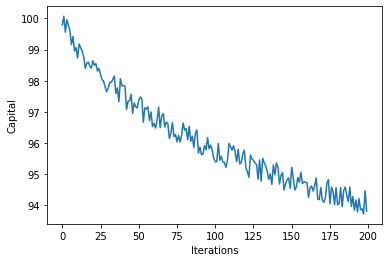

In [ ]:
plt.plot(farm_capital)
plt.ylabel("Capital")
plt.xlabel("Iterations")
plt.show()

From above graphs we infer that when the capital of one of the middle men is much higher compared to that of the other players, that company tends to dominate the market. In this case we observe that the farmers' capital reduces making this the worst case scenario. 

# Results and inferences 
From the graphs, the main inference is that in an ideal market where all middlemen have comparable capital leads to a perfectely competitive market over a period of time. 

In the case where one of the middlemen have extremely high capital, we observed the monopolisation of the market in which case the farmers' capital was observed to drop. 

In the perfectly competitive market the farmers' capital is observed to rise, which implies that the ecpansion of the market is beneficial for all. 

# Alternate Model (Not implemented)
The following code describes one of the other models that we tried but were unable to implement as we were unable to proceed beyond a point. We have included this model in the report just as an additional thought. 


In [ ]:
C1 = 100000
C2 = 1000000

S1 = 1
S2 = 0

P2 = 80
P1 = 30
S = []

for i in range(2000):  
  P_apmc = (C2*P1+C1*P2)/(C1+C2)
  P_corp = (C1*P1 + C2*P2)/(C1+C2)
  S1 = np.maximum((S1 - 0.001*(P_corp - P_apmc)/P_corp),0)
  S2 = np.maximum((S2 + 0.001*(P_corp - P_apmc)/P_apmc),0)

  S1 = S1/(S1+S2) 
  S2 = S2/(S1+S2)
  # if S1 > 1:
  #   S1 = 1
  # if S1 < 0:
  #   S1 = 0
  S.append(S1)
  C1 = C1 + (P2 - P_apmc)*S1*5000
  C2 = C2 + (P2 - P_corp)*S2*5000

In [ ]:
prob_corp = []
prob_mandi = []

expected_corp = 0
expected_mandi = 0

for P in range(P1,P2):
  p_corp = 2*(C2/(C1+C2))*(P2-P)/((P2-P1)*(P2-P1+1))
  prob_corp.append(p_corp)
  expected_corp = expected_corp + P*p_corp

  p_mandi = 2*(C1/(C1+C2))*(P2-P)/((P2-P1)*(P2-P1+1))
  prob_mandi.append(p_mandi)
  expected_mandi = expected_mandi + P*p_mandi

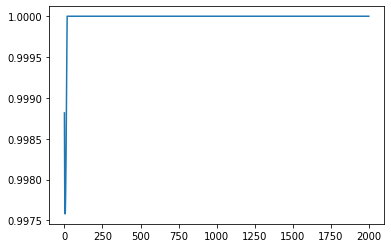

In [ ]:
plt.plot(S)

In [ ]:
C1 = 100000
C2 = 1000000

S1 = 1
S2 = 0

P2 = 80
P1 = 30
S = []

for i in range(5000):  
  P_apmc = (C2*P1+C1*P2)/(C1+C2)
  P_corp = (C1*P1 + C2*P2)/(C1+C2)
  S1 = np.maximum((S1 - 0.001*(1-math.exp(-1*(P_corp - P_apmc)))),0)
  S2 = 1 - S1
  # if S1 > 1:
  #   S1 = 1
  # if S1 < 0:
  #   S1 = 0
  S.append(S1)
  C1 = C1 + (P2 - P_apmc)*S1*5000
  C2 = C2 + (P2 - P_corp)*S2*5000 

OverflowError: ignored

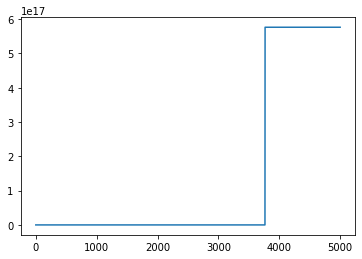

In [ ]:
plt.plot(S)
